# Hypothesis Test (cust-seg)


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import scipy.stats as stats


In [4]:
import os
os.chdir('C:\\Users\\HP\\Desktop\\AnalytixLabs\\DATA SCIENCE')

In [5]:
cust_seg=pd.read_csv('5. Statistical Tests Case Study-1\\5. Statistical Tests Case Study-1\\cust_seg.csv')
cust_seg.head(10)

,custid,sex,AqChannel,region,Marital_status,segment,pre_usage,Post_usage_1month,Latest_mon_usage,post_usage_2ndmonth
0,70,0,4,1,1,1,57,52,49.2,57.2
1,121,1,4,2,1,3,68,59,63.6,64.9
2,86,0,4,3,1,1,44,33,64.8,36.3
3,141,0,4,3,1,3,63,44,56.4,48.4
4,172,0,4,2,1,2,47,52,68.4,57.2
5,113,0,4,2,1,2,44,52,61.2,57.2
6,50,0,3,2,1,1,50,59,50.4,64.9
7,11,0,1,2,1,2,34,46,54.0,50.6
8,84,0,4,2,1,1,63,57,64.8,62.7
9,48,0,3,2,1,2,57,55,62.4,60.5


In [6]:
cust_seg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
custid                 200 non-null int64
sex                    200 non-null int64
AqChannel              200 non-null int64
region                 200 non-null int64
Marital_status         200 non-null int64
segment                200 non-null int64
pre_usage              200 non-null int64
Post_usage_1month      200 non-null int64
Latest_mon_usage       200 non-null float64
post_usage_2ndmonth    200 non-null float64
dtypes: float64(2), int64(8)
memory usage: 15.7 KB


In [7]:
cust_describe=cust_seg.describe().T
cust_describe
cust_describe.to_excel('cust_describe.xlsx')


In [8]:
cust_describe

,count,mean,std,min,25%,50%,75%,max
custid,200.0,100.5000,57.879185,1.0,50.750,100.5,150.25,200.0
sex,200.0,0.5450,0.499220,0.0,0.000,1.0,1.00,1.0
AqChannel,200.0,3.4300,1.039472,1.0,3.000,4.0,4.00,4.0
region,200.0,2.0550,0.724291,1.0,2.000,2.0,3.00,3.0
Marital_status,200.0,1.1600,0.367526,1.0,1.000,1.0,1.00,2.0
segment,200.0,2.0250,0.690477,1.0,2.000,2.0,2.25,3.0
pre_usage,200.0,52.2300,10.252937,28.0,44.000,50.0,60.00,76.0
Post_usage_1month,200.0,52.7750,9.478586,31.0,45.750,54.0,60.00,67.0
Latest_mon_usage,200.0,63.1740,11.242137,39.6,54.000,62.4,70.80,90.0
post_usage_2ndmonth,200.0,58.0525,10.426445,34.1,50.325,59.4,66.00,73.7


## 1 :  Card usage has been improved significantly from last year usage which is 50.

In [9]:
#the null hypothesis is :         Ho=50
# and Alternative Hypothesis is : H1#50


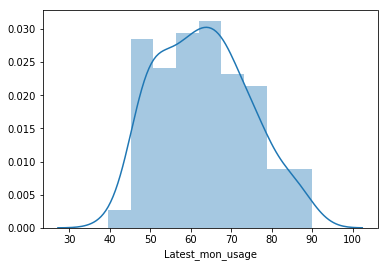

In [10]:
# Latest month usage data is normally distributed
sns.distplot(cust_seg.Latest_mon_usage)

In [11]:
# Using one sample T test  
stats.ttest_1samp(a=cust_seg.Latest_mon_usage,popmean=50)

Ttest_1sampResult(statistic=16.57233752433133, pvalue=2.4963719280931583e-39)

In [12]:
cust_seg.Latest_mon_usage.mean()

63.17400000000001

## 2 :  The last compaign was successful in terms of credit card.

In [13]:
# Here we are compair two poputation so we want use paired sample t test between post month usage 
# and pre month usage.
# Ho = H1  (Null hypo. it means there is no significant improvement)
# Ho # H1  (Alternate Hypot it means there are significant improvement in the card usage) 

# (a=pre_usage,b=Post 1 month usage)
stats.ttest_rel(a=cust_seg.pre_usage,b=cust_seg.Post_usage_1month)

Ttest_relResult(statistic=-0.8673065458794775, pvalue=0.3868186820914985)

In [14]:
#(a=pre_usage,b=Post 2 month usage)
stats.ttest_rel(a=cust_seg.pre_usage,b=cust_seg.post_usage_2ndmonth)

Ttest_relResult(statistic=-8.866832246938742, pvalue=4.295733828012836e-16)

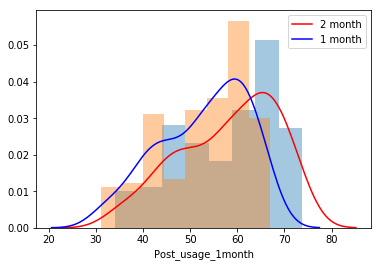

In [15]:

sns.distplot(cust_seg.post_usage_2ndmonth,kde_kws={"color": "r", "label": "2 month"})
sns.distplot(cust_seg.Post_usage_1month,kde_kws={"color": "b", "label": "1 month"})


## 3:   Is there any difference between males and females in term of credit usage.

In [16]:
# Ho = H1 ( mean of males usage is equal to the mean of females usage)
# ho # h1 ( mean of males usage is not equal to the mean of females usages)
Males_spend=cust_seg.Post_usage_1month[cust_seg.sex==0]
Females_spend=cust_seg.Post_usage_1month[cust_seg.sex==1]
# here i am using t test (independent sample t test)
stats.ttest_ind(a=Males_spend,b=Females_spend,equal_var=False) # Assume sample have unequal variance


Ttest_indResult(statistic=-3.6564080478875276, pvalue=0.00034088493594266187)

In [18]:
stats.ttest_ind(a=Males_spend,b=Females_spend,equal_var=True) #Assume sample have equal variance

Ttest_indResult(statistic=-3.7340738531536797, pvalue=0.00024625461203549315)

## 4  :    Is there any difference between segments of customers in term of credit card usage.

In [20]:
# Ho =there is no any difference between segments of cust in term of card usage
# H1= there is difference between segment of cust. in term of card usage

s1=cust_seg.Latest_mon_usage[cust_seg.segment==1]
s2=cust_seg.Latest_mon_usage[cust_seg.segment==2]
s3=cust_seg.Latest_mon_usage[cust_seg.segment==3]

#number of catagorical variable is greater then 2 therefore, i am using ANOVA test
stats.f_oneway(s1,s2,s3)

F_onewayResult(statistic=29.279283801321778, pvalue=7.36401083352674e-12)

Text(0.5,1,'Count of each segment')

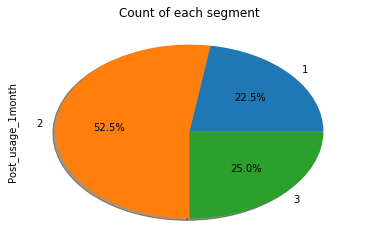

In [28]:
cust_seg.groupby("segment").Post_usage_1month.count().plot(kind="pie",shadow=True, autopct='%1.1f%%');

plt.title("Count of each segment")

## 5 :    Is there any relation between region & segment .

In [36]:
# Ho=there are  reation between region and segment
# H1=there are no relation between region and segment

# here we are check for of independence. therefore, i am using Chi Square test.

M=pd.crosstab(cust_seg.segment,cust_seg.region,margins=True)
print(M)
stats.chi2_contingency(observed=M)



region    1   2   3  All
segment                 
1        16  20   9   45
2        19  44  42  105
3        12  31   7   50
All      47  95  58  200


(16.60444164948934,
 0.055282939487992365,
 9,
 array([[ 10.575,  21.375,  13.05 ,  45.   ],
        [ 24.675,  49.875,  30.45 , 105.   ],
        [ 11.75 ,  23.75 ,  14.5  ,  50.   ],
        [ 47.   ,  95.   ,  58.   , 200.   ]]))

## 6:  Is the relationship between card usage in the latest month and pre usage of compaign

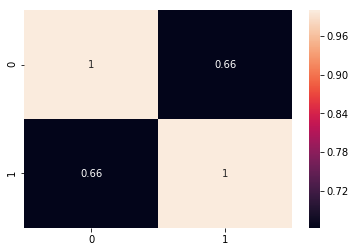

In [43]:
# Here we are finding the relation between two variable therefore, i will go for Correlation 
sns.heatmap(np.corrcoef(cust_seg.Latest_mon_usage,cust_seg.pre_usage),annot=True)